In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./timeseries_banana.csv',nrows=365)
df.tail(5)

,日期,Price
360,2019-12-27,35.200
361,2019-12-28,33.850
362,2019-12-29,33.500
363,2019-12-30,33.225
364,2019-12-31,32.950


In [4]:
#單根檢定
import statsmodels.api
statsmodels.tsa.stattools.adfuller(df.Price)

#評斷:(1)ADF統計值 < 臨界值 (2)p-value < 0.05
#adf結果為t - Statistic: -2.873, 落在1-5%臨界值,p值為0.04, 以顯著水準1%來看,大於1%無法拒絕該假設,數據為非定態 (如果以5%來看就定態)

(-2.873253094537034,
 0.04854787797529406,
 9,
 355,
 {'1%': -3.448905534655263,
  '5%': -2.8697161816205705,
  '10%': -2.5711258103550882},
 1291.6584856046447)

In [14]:
#一階微分後的單根檢定
df_diff1 = df.Price.diff(1)[1:]  # df_diff1[0] is nan
# df_diff1
statsmodels.tsa.stattools.adfuller(df_diff1)

(-6.231995408177296,
 4.927721113448814e-08,
 8,
 355,
 {'1%': -3.448905534655263,
  '5%': -2.8697161816205705,
  '10%': -2.5711258103550882},
 1293.2096666097727)

In [3]:
df = df.rename(columns={'日期':'date'})
df['date'] = pd.to_datetime(df['date'])
df = df.set_index(['date'], drop=True)
df.head(5)

,Price
date,
2019-01-01,28.00
2019-01-02,29.90
2019-01-03,29.05
2019-01-04,28.70
2019-01-05,31.80


<AxesSubplot:xlabel='date'>

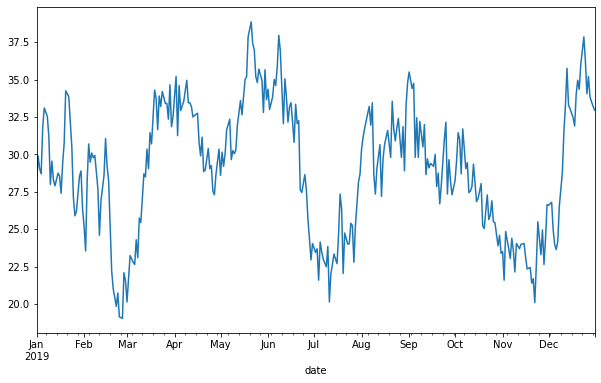

In [4]:
plt.figure(figsize=(10, 6))

df['Price'].plot()

In [ ]:
#!pip install statsmodels

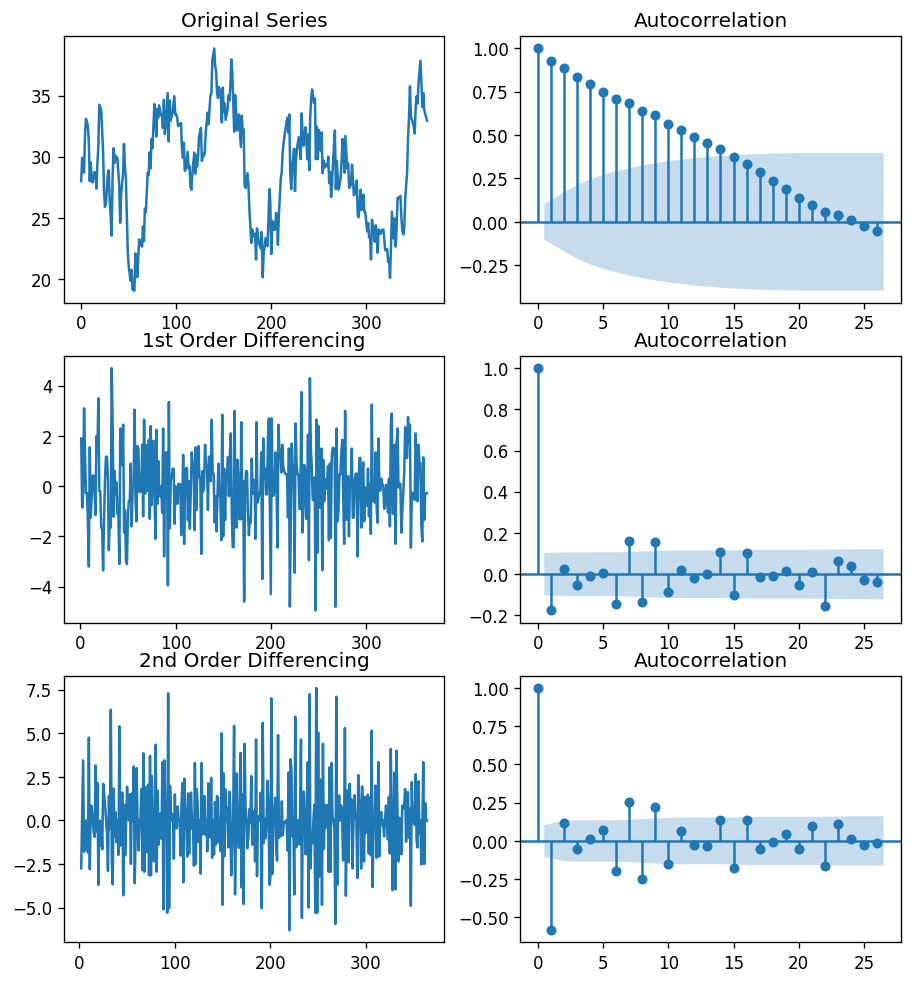

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#大小,解析度 
plt.rcParams.update({'figure.figsize':(9,10), 'figure.dpi':120})

# sharex->是否共享x軸  sharey->是否共享y軸
fig, axes = plt.subplots(3, 2, sharex=False)

# Original Series
#使用迴歸來分析時間序列資料時，誤差項可能依時間先後有相關性，此稱為自相關現象 (autocorrelation)，此種資料違背獨立性的情況，會表現在殘差圖上，需修正模式。
axes[0, 0].plot(df.Price); axes[0, 0].set_title('Original Series')
plot_acf(df.Price, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.Price.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Price.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.Price.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.Price.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

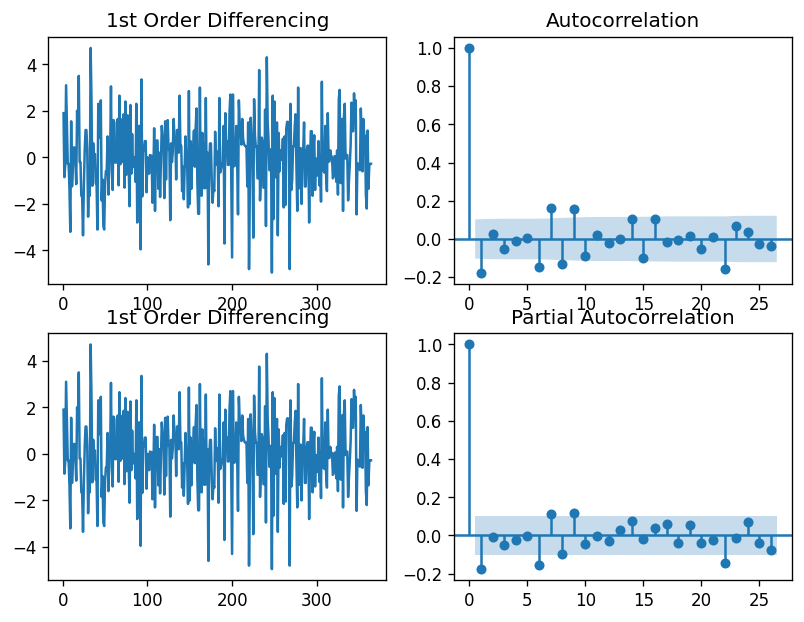

In [4]:
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':120})
fig, axes = plt.subplots(2, 2, sharex=False)

#橫軸落後期數,縱軸:自相關係數
# 1st Differencing
axes[0, 0].plot(df.Price.diff()); axes[0, 0].set_title('1st Order Differencing')
plot_acf(df.Price.diff().dropna(), ax=axes[0, 1])
#lag1、lag2後，偏自相關落入了藍色背景區間內，表示不相關

#橫軸落後期數,縱軸:偏自相關係數
#預測誤差，預測誤差是自迴歸預測和真實值之間的偏差
axes[1, 0].plot(df.Price.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(df.Price.diff().dropna(), ax=axes[1, 1])

plt.show()

In [5]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,1 ARIMA Model

#(p,d,q) p:表示y的當前值和前p個歷史值有關、d:非定態可以通過差分來得到定態、表示y的當前值和前q個歷史值AR預測誤差有關
model = ARIMA(df.Price, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -680.676
Method:                       css-mle   S.D. of innovations              1.570
Date:                Tue, 13 Jul 2021   AIC                           1369.351
Time:                        16:51:41   BIC                           1384.940
Sample:                             1   HQIC                          1375.547
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0129      0.069      0.188      0.851      -0.122       0.148
ar.L1.D.Price    -0.0840      0.476     -0.176      0.860      -1.018       0.850
ma.L1.D.Price    -0.0945      0.481     

C:\Users\Tibame_T14\anaconda3\envs\py38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Tibame_T14\anaconda3\envs\py38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and 

C:\Users\Tibame_T14\anaconda3\envs\py38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Tibame_T14\anaconda3\envs\py38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


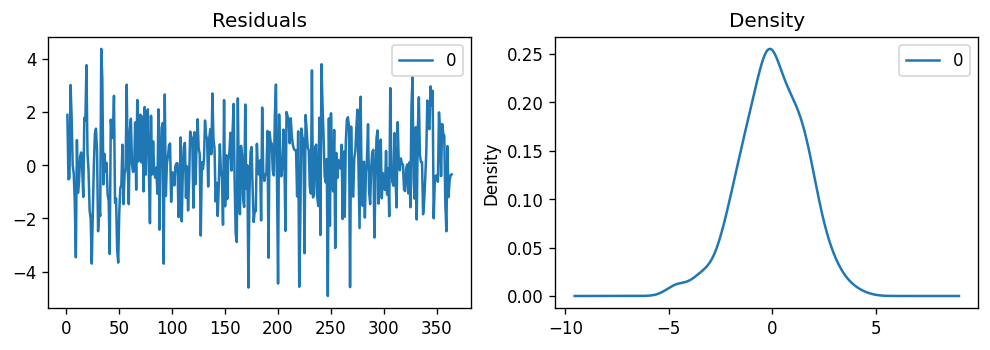

In [6]:
# Plot residual errors
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':120})
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

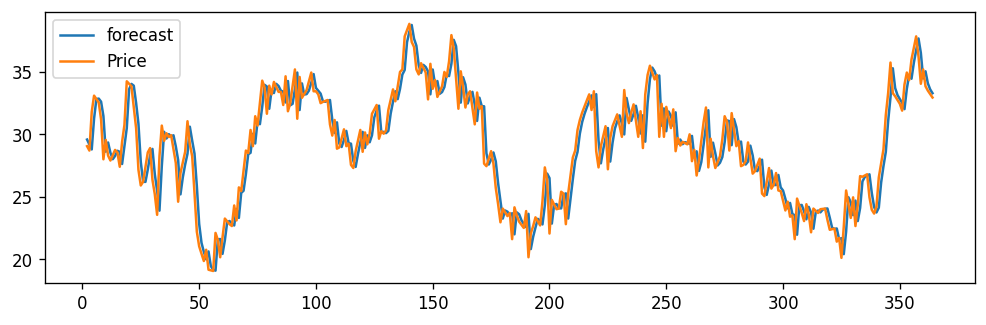

In [7]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

C:\Users\Tibame_T14\anaconda3\envs\py38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Tibame_T14\anaconda3\envs\py38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and 

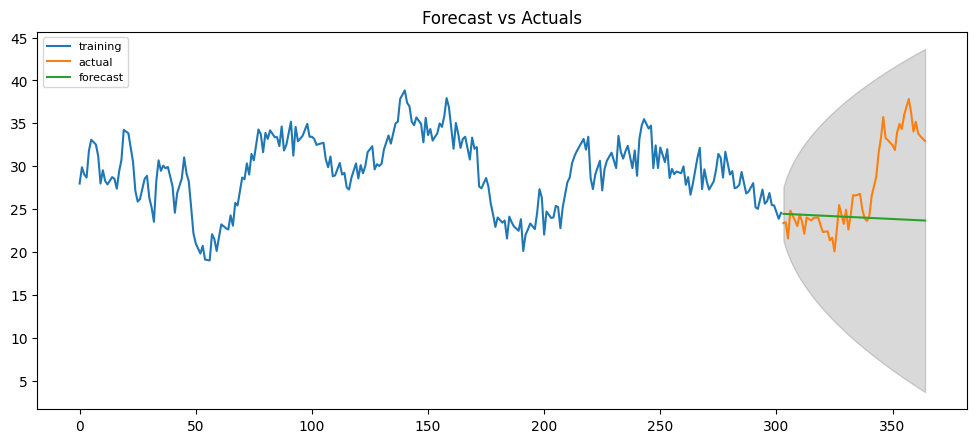

In [6]:
from statsmodels.tsa.stattools import acf
# from statsmodels.tsa.arima.model import ARIMA


# Create Training and Test
train = df.Price[:303]
test = df.Price[303:]

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(62, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [52]:
#!pip install pmdarima

  Using cached pmdarima-1.8.2-cp38-cp38-win_amd64.whl (596 kB)
  Using cached Cython-0.29.23-cp38-cp38-win_amd64.whl (1.7 MB)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1369.351, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1376.831, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1367.392, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1367.380, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1374.858, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1369.370, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1371.198, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1365.417, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1367.387, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1367.406, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1365.426, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1369.233, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.462 seconds
                               SARIMAX Results                                
Dep. Vari

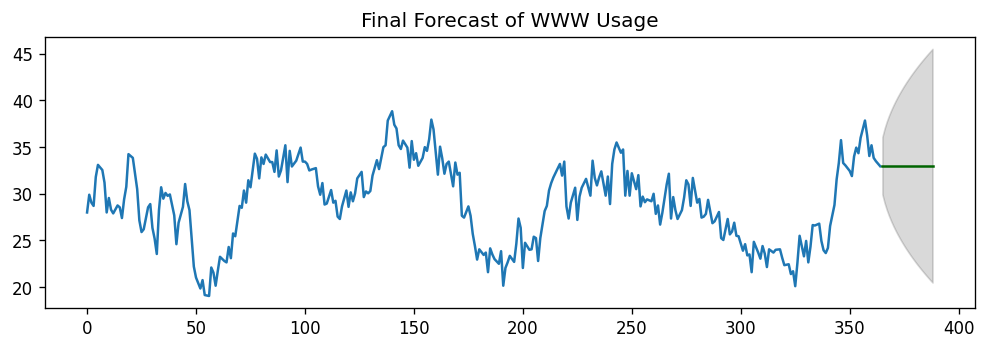

In [53]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(df.Price, start_p=1, start_q=1,
                      information_criterion='aic',
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.Price), len(df.Price)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.Price)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast ")
plt.show()